In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [ ]:
# Unzip fruits folder
!unzip -q '/content/drive/My Drive/fruits-5.zip'

In [ ]:
# GDRIVEPATH='/content/fruits-360_dataset/fruits-360'
GDRIVEPATH='/content/fruits-360-dataset/fruits-360'

In [ ]:
base_dir = GDRIVEPATH

# Directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Training
train_apple_dir = os.path.join(train_dir, 'apple')
train_banana_dir = os.path.join(train_dir, 'banana')
train_cherry_dir = os.path.join(train_dir, 'cherry')
train_grape_dir = os.path.join(train_dir, 'grape')
train_peach_dir = os.path.join(train_dir, 'peach')
# train_apple_dir = os.path.join(train_dir, 'Apple Red 1')
# train_banana_dir = os.path.join(train_dir, 'Banana')
# train_cherry_dir = os.path.join(train_dir, 'Cherry 1')
# train_grape_dir = os.path.join(train_dir, 'Grape Blue')
# train_kiwi_dir = os.path.join(train_dir, 'Kiwi')

# Validation
validation_apple_dir = os.path.join(validation_dir, 'apple')
validation_banana_dir = os.path.join(validation_dir, 'banana')
validation_cherry_dir = os.path.join(validation_dir, 'cherry')
validation_grape_dir = os.path.join(validation_dir, 'grape')
validation_peach_dir = os.path.join(validation_dir, 'peach')
# validation_apple_dir = os.path.join(validation_dir, 'apple')
# validation_banana_dir = os.path.join(validation_dir, 'Bananas(lady_finger)1')
# validation_cherry_dir = os.path.join(validation_dir, 'cherries')
# validation_grape_dir = os.path.join(validation_dir, 'grape_pear_mandarine')
# validation_kiwi_dir = os.path.join(validation_dir, 'kiwi')

# Test
test_apple_dir = os.path.join(test_dir, 'apple')
test_banana_dir = os.path.join(test_dir, 'banana')
test_cherry_dir = os.path.join(test_dir, 'cherry')
test_grape_dir = os.path.join(test_dir, 'grape')
test_peach_dir = os.path.join(test_dir, 'peach')
# test_apple_dir = os.path.join(test_dir, 'Apple Red 1')
# test_banana_dir = os.path.join(test_dir, 'Banana')
# test_cherry_dir = os.path.join(test_dir, 'Cherry')
# test_grape_dir = os.path.join(test_dir, 'Grape Blue')
# test_kiwi_dir = os.path.join(test_dir, 'Kiwi')


In [ ]:
print('total training apple images:', len(os.listdir(train_apple_dir)))
print('total training banana images:', len(os.listdir(train_banana_dir)))
print('total training cherry images:', len(os.listdir(train_cherry_dir)))
print('total training grape images:', len(os.listdir(train_grape_dir)))
print('total training peach images:', len(os.listdir(train_peach_dir)))

total training apple images: 493
total training banana images: 491
total training cherry images: 493
total training grape images: 985
total training peach images: 493


In [ ]:
# Building the network
from keras import layers
from keras import models

model = models.Sequential()
# First
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Second
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Third
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Fourth
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Fifth
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# Flatten and Dropout
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
# 512 neurons in hidden layer
model.add(layers.Dense(512, activation='relu'))
# Output 5 categories
model.add(layers.Dense(5, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 15, 15, 128)     

In [ ]:
# Selecting categorical_crossentropy as a loss function and RMSprop optimizer
from keras import optimizers

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])


In [ ]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20)
        # class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        # test_dir,
        validation_dir,
        target_size=(150, 150),
        batch_size=20)
        # class_mode='binary')


Found 2950 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


In [ ]:
# Training
history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
25/25 [==============================] - 39s 2s/step - loss: 1.6044 - acc: 0.4960 - val_loss: 0.5709 - val_acc: 0.8340
Epoch 2/10
25/25 [==============================] - 37s 1s/step - loss: 0.4317 - acc: 0.7898 - val_loss: 0.2065 - val_acc: 0.8000
Epoch 3/10
25/25 [==============================] - 37s 1s/step - loss: 0.3253 - acc: 0.8400 - val_loss: 0.1719 - val_acc: 0.8320
Epoch 4/10
25/25 [==============================] - 37s 1s/step - loss: 0.7220 - acc: 0.8120 - val_loss: 0.3045 - val_acc: 0.8000
Epoch 5/10
25/25 [==============================] - 37s 1s/step - loss: 0.2885 - acc: 0.8380 - val_loss: 0.0517 - val_acc: 1.0000
Epoch 6/10
25/25 [==============================] - 37s 1s/step - loss: 0.2355 - acc: 0.8980 - val_loss: 0.0636 - val_acc: 1.0000
Epoch 7/10
25/25 [==============================] - 37s 1s/step - loss: 0.2351 - acc: 0.9180 - val_loss: 0.0738 - val_acc: 1.0000
Epoch 8/10
25/25 [==============================] - 37s 1s/step - loss: 0.2348 - acc: 0.91

In [ ]:
model.save(GDRIVEPATH+'fruits_trained.h5')

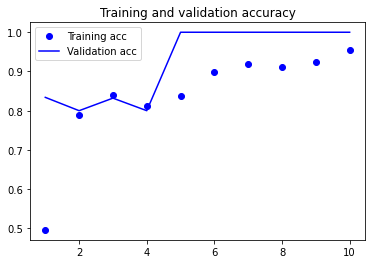

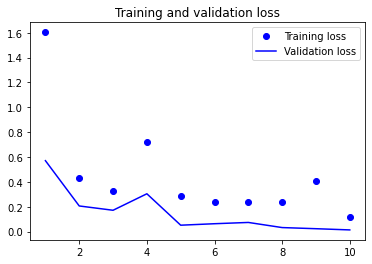

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# results = model.evauluate(history.history['loss'], history.history['val_acc'])

# model.predict(test_dir)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()